In [1]:
from sklearn.model_selection import train_test_split   #importing train_test_split which we would use later  
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('Heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
def hypothesis_function(X, theta):
    z = np.dot(theta, X.T)
    return 1/(1+np.exp(-(z))) - 0.0000001

In [3]:
def cost_function(X, y, theta):
    y1 = hypothesis_function(X, theta)
    return -(1/len(X)) * np.sum(y*np.log(y1) + (1-y)*np.log(1-y1))

In [4]:
def gradientDescent(X, y, theta, alpha, number_of_simples):
    m =len(X)
    J = [cost_function(X, y, theta)] 
    for i in range(0, number_of_simples):
        h = hypothesis_function(X, theta)
        for i in range(0, len(X.columns)):
            theta[i] -= (alpha/m) * np.sum((h-y)*X.iloc[:, i])
        J.append(cost_function(X, y, theta))
    return J, theta

In [5]:
def predictor(X, y, theta, alpha, number_of_simples):
    J, th = gradientDescent(X, y, theta, alpha, number_of_simples) 
    h = hypothesis_function(X, theta)
    for i in range(len(h)):
        h[i]=1 if h[i]>=0.5 else 0
    y = list(y)
    acc = np.sum([y[i] == h[i] for i in range(len(y))])/len(y)
    return J, acc

In [6]:
X = df.drop(columns=["age", "sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"])
y = df["target"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [8]:
print('The shape of the input training set is {}'.format(X_train.shape))
print('The shape of the output training set is {}'.format(y_train.shape))
print('The shape of the input testing set is {}'.format(X_test.shape))
print('The shape of the output testing set is {}'.format(y_test.shape))

The shape of the input training set is (227, 5)
The shape of the output training set is (227,)
The shape of the input testing set is (76, 5)
The shape of the output testing set is (76,)


In [9]:
theta = [0.5] * len(X.columns)
# thetaTest = [0.5] * len(X_train.columns)
# thetaTraining = [0.5] * len(X_test.columns)
JTraining, accTraining = predictor(X_train, y_train, theta, 0.0001, 30000)
JTest, accTest = predictor(X_test, y_test, theta, 0.0001, 25000)


C:\Users\Dell\AppData\Local\Temp/ipykernel_20288/1476496222.py:3: RuntimeWarning: invalid value encountered in log
  return -(1/len(X)) * np.sum(y*np.log(y1) + (1-y)*np.log(1-y1))


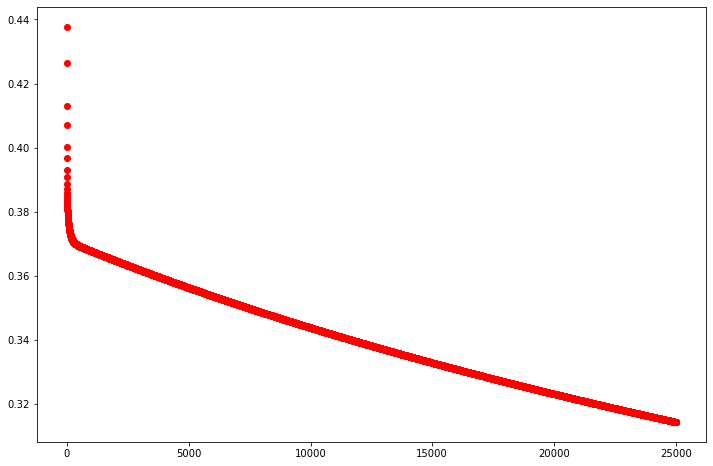

Test accuracy of the training set: 80.18 
Test accuracy of the test set: 90.79 


In [35]:
plt.figure(figsize = (12, 8))
plt.scatter(range(0, len(JTest)), JTest, color="red")
plt.show()
print("Test accuracy of the training set: {:.2f} ".format(accTraining * 100))
print("Test accuracy of the test set: {:.2f} ".format(accTest * 100))